Jared Hawkins - jmh7ax

1a. 
$\mathcal{L}(\theta) = \prod_{i=1}^{N} 2αx_i exp(−αx_i^2)$ <br> 
$\ell(\theta) = \sum_{i=1}^{N} [ln(p(x_i; α))] = \sum_{i=1}^{n}[ln(2αx_i) − αx_i^2]$ <br>
Max where (d/d$α$) $\ell(\theta) = 0$ <br>
$(d/dα)\ell(\theta) = \sum_{i=1}^{N}1/α - x_i^2$<br>
$(d/dα)\ell(\theta) = N/α - \sum_{i=1}^{N}x_i^2 = 0$ <br>
$\sum_{i=1}^{N}x_i^2 = N/α$<br>
$α = N/\sum_{i=1}^{N}x_i^2$


1b. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('traffic.csv')
df = pd.DataFrame(data)

In [4]:
n = len(df)
index = df.index.values
total = 0

for x in index:
   total+= df.loc[x] * df.loc[x]
    
    
print(n/total)





5.657063396653988496e-01    1.165649
Name: 0, dtype: float64


1b. For the traffic data, $α$ = 1.165649 using my MLE equation

1c.

/Users/jaredhawkins/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


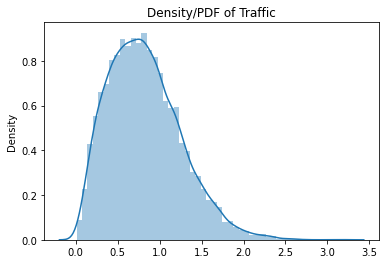

In [5]:
sns.distplot(df)
plt.title("Density/PDF of Traffic")

plt.show()

2a.

In [6]:
from scipy.special import comb

def hypergeometric(N, K, n, k):
    total = comb(K,k) * comb((N-K), (n-k)) / comb(N,n)
    return total

In [7]:
print(hypergeometric(8,4,4,2))
print(hypergeometric(8,4,4,3))
print(hypergeometric(8,4,4,4))

0.5142857142857142
0.22857142857142856
0.014285714285714285


2b.

In [8]:
print(hypergeometric(100,10,50,10))

0.0005934196725858289


2c.

In [9]:
total = 0
for x in range(5,11):
    total += hypergeometric(100,10,50,x)
print(total)

0.6296667731127679


3a.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cardiac.csv")

In [11]:
menHype = sum((df['gender']==0) & (df['hxofHT']==0))
menNoHype = sum((df['gender']==0) & (df['hxofHT']==1))
womenHype = sum((df['gender']==1) & (df['hxofHT']==0))
womenNoHype = sum((df['gender']==1) & (df['hxofHT']==1))

print(menHype, menNoHype, womenHype, womenNoHype)

144 76 249 89


In [12]:
from tabulate import tabulate
table = [['gender / htofHT', 'HT', 'No HT'], ['Men', 144, 76], ['Women', 249, 89]]

print(tabulate(table))

---------------  ---  -----
gender / htofHT  HT   No HT
Men              144  76
Women            249  89
---------------  ---  -----


3b.

In [19]:
n = 249+89
K = 76+89
k = 89
N = 144+n+K-k

print(hypergeometric(N,K,n,k))

0.008846092806851051


3c. The null hypothesis is that the probability of men and women having hypertension is equal

3d. 

In [22]:
menHype = 0

for i in range(26, 50, 1):
    menHype += hypergeometric(288, 144, 50, i)
    
womenHype = 0

for j in range(26, 50, 1):
   womenHype += hypergeometric(338, 169, 50, j)
     
print(womenHype - menHype)

0.0009343189934158391


p < .05

Reject the null hypothesis that the probability of men and women having hypertension is equal